In [18]:
import numpy as np

In [19]:
import pandas_datareader as pdr

In [20]:
import datetime as dt
import pandas as pd

In [21]:
start = dt.datetime(2021, 1, 1)
data = pdr.get_data_yahoo("PLTR", start)

TypeError: string indices must be integers

In [ ]:
pip install yfinance

In [27]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

data = pdr.get_data_yahoo('PLTR', datetime(1970, 1, 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

In [ ]:
data.dtypes

In [ ]:
type(data)

### NumPy

In [ ]:
data.to_numpy()

In [ ]:
arr = data.to_numpy()

In [ ]:
arr.shape

In [ ]:
len(data)

In [ ]:
arr[0]

In [ ]:
data.head(1)

In [ ]:
arr.dtype

In [ ]:
small = arr[:10, 0].copy()

In [ ]:
small

In [ ]:
data.head()

In [ ]:
np.max(small)

In [ ]:
small.max()

In [ ]:
small.argmax()

In [ ]:
small

In [ ]:
small[small.argmax()]

In [ ]:
np.log(small)

In [ ]:
np.log(data)

In [ ]:
data/data.shift()

In [ ]:
np.sum(np.log(data/data.shift()))

In [ ]:
np.log(data/data.iloc[0]).tail(1)

In [ ]:
small.shape

In [ ]:
small.reshape(2, 5)

In [ ]:
small.reshape(10, 1)

In [ ]:
small.reshape(-1, 1)

# Portfolios


In [ ]:
tickers = ["PLTR", "TWTR", "BB", "IBM"]

In [ ]:
start = dt.datetime(2021, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

In [ ]:
data.head()

In [ ]:
data = data["Adj Close"]
data.head()

In [ ]:
portfolios = [.83, .07, .05, .05]

In [ ]:
np.sum(portfolios)

In [ ]:
(data/data.iloc[0])*portfolios

In [ ]:
weight = np.random.random(4)
weight /= weight.sum()
weight

In [ ]:
weight.sum()

In [ ]:
data = pdr.get_data_yahoo("PLTR", start)

In [ ]:
data.head()

In [ ]:
high_low = data["High"] - data["Low"]
high_cp = np.abs(data["High"] - data["Close"].shift())

In [ ]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [ ]:
start = dt.datetime(2021, 1, 1)
data = pdr.get_data_yahoo("NFLX", start)

 "metadata": {},
   "source": [
    "### Formula\n",
    "$TR = \\max[H − L, |H − C_P|, |L − C_P|]$\n",
    "\n",
    "$ATR = \\frac{1}{n}\\sum_{i=1}^{n} TR_i$\n",
    "\n",
    "- $TR_i$: A particular True Range\n",
    "- $n$: The time period employed\n",
    "- $H$: Current High\n",
    "- $L$: Current Low\n",
    "- $C_P$: Previous Close\n"
    

In [ ]:
data.head()

In [ ]:
high_low = data["High"] - data["Low"]
high_cp = np.abs(data["High"] - data["Close"].shift())
low_cp =np.abs(data["Low"] - data["Close"].shift())

In [ ]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [ ]:
true_range = np.max(df, axis=1)

In [ ]:
true_range

In [ ]:
average_true_range = true_range.rolling(14).mean()

In [ ]:
average_true_range

In [ ]:
true_range.rolling(14).sum()/14

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib notebook

In [ ]:
fig, ax = plt.subplots()
average_true_range.plot(ax=ax)
ax2 = data["Close"].plot(ax=ax, secondary_y=True, alpha=0.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price")

In [ ]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [ ]:
tickers = ["PLTR", "BB", "TWTR", "AAPL"]
start = dt.datetime(2021, 1, 1)
data = pdr.get_data_yahoo(tickers, start)
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [ ]:
data.head()

In [ ]:
data = data["Adj Close"]

In [ ]:
data

In [ ]:
portfolio = [.50, .25,.10, .15]

In [ ]:
np.sum(portfolio)

In [ ]:
log_return = np.sum(np.log(data/data.shift())*portfolio,axis=1)

In [ ]:
log_return

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [ ]:
log_return.std()

In [ ]:
log_return.mean()

In [ ]:
sharpe_ratio = log_return.mean()/log_return.std()

In [ ]:
asr = sharpe_ratio*255**.5

In [ ]:
asr

In [ ]:
weight = np.random.random(4)
weight /= weight.sum()
weight

In [ ]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [ ]:
asr2 = sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [ ]:
asr2

In [ ]:
import numpy as np

In [ ]:
def roll_dice():
    return np.sum(np.random.randint(1, 7, 2))

In [ ]:
roll_dice()

In [ ]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [ ]:
monte_carlo_simulation()

In [ ]:
np.zeros(2)

In [ ]:
165*5

In [ ]:
monte_carlo_simulation()

In [ ]:
results = np.zeros(1000)

for i in range(1000):
    results[i]= monte_carlo_simulation()[0]

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib notebook

In [ ]:
fig, ax = plt.subplots()
ax.hist(results, bins=15)

In [ ]:
results.mean()*5

In [ ]:
1000 - results.mean()

In [ ]:
results.mean()/1000

In [ ]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [ ]:
mat = np.add.outer(d1, d2)

In [ ]:
mat

In [ ]:
mat.size

In [ ]:
mat[mat == 7].size

In [ ]:
mat[mat == 7].size/mat.size

# Monte carlo with portfolios and Sharpe Ratio


In [25]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [29]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2021, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [30]:
data = data["Adj Close"]

In [31]:
data.head()

,AAPL,IBM,MSFT,TWTR
Date,,,,
2021-01-04 00:00:00-05:00,127.680023,106.178658,213.342026,54.529999
2021-01-05 00:00:00-05:00,129.258591,108.063400,213.547821,53.880001
2021-01-06 00:00:00-05:00,124.907562,110.762001,208.010651,53.259998
2021-01-07 00:00:00-05:00,129.169815,110.504974,213.930038,52.330002
2021-01-08 00:00:00-05:00,130.284698,110.110901,215.233459,51.480000


In [32]:
log_returns = np.log(data/data.shift())

In [33]:
weight = np.random.random(4)
weight /= weight.sum()
weight


array([0.37739213, 0.19749107, 0.40744752, 0.01766928])

In [34]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [35]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [36]:
sharpe_ratio = exp_rtn / exp_vol

In [37]:
sharpe_ratio

0.32690137462700286

In [49]:
# Monte Carlo Simulation
n = 500
weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_raios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [47]:
sharpe_ratios.max()

0.4567226851190623

In [46]:
sharpe_ratios.argmax()

2995

In [45]:
weights[3153]
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


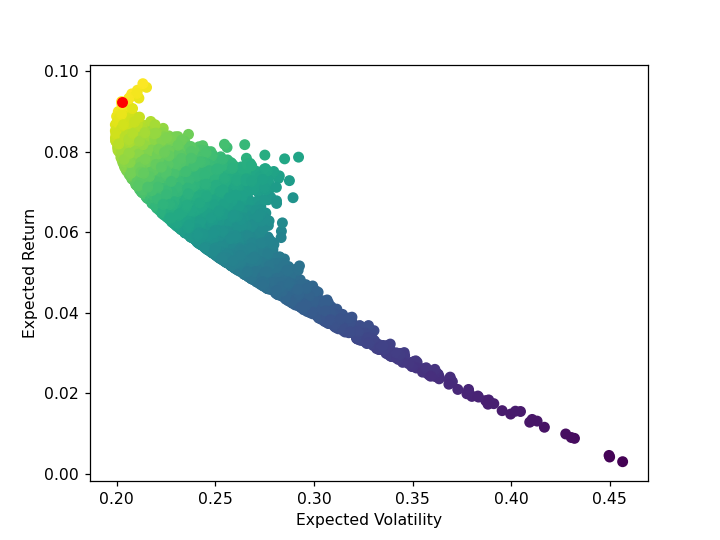

Text(0, 0.5, 'Expected Return')

In [48]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')